## Linear Regression

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [116]:
class OLSLinearRegression:
    """
    OLS Linear Regression
    """
    def __init__(self, X, y, method='ols'):
        self.num_features = X.shape[1]
        self.num_samples = X.shape[0]
        self.theta = np.zeros((self.num_features + 1, 1))
        self.X = X
        self.y = y

    def fit(self):
        bias = np.ones((self.num_samples, 1))
        X = np.hstack((bias, self.X))
        self.theta = np.dot(
            np.dot(
                np.linalg.pinv(np.dot(X.T, X)),
                X.T
            ), self.y
        )

    def predict(self, X_test):
        bias = np.ones((X_test.shape[0], 1))
        X_test = np.hstack((bias, X_test))
        y_hat = np.dot(X_test, self.theta)
        return y_hat

    def get_coeffs(self):
        return {
            "bias" : self.theta[:1],
            "coeffs" : self.theta[1:]
        }

In [297]:
class GDLinearRegression:
    """
    Linear Regression via gradient descent
    """
    def __init__(self, X, y, learning_rate=0.01, num_iters=100):
        self.num_features = X.shape[1]
        self.num_samples = X.shape[0]
        self.theta = np.zeros((self.num_features + 1, 1))
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.num_iters = num_iters

    def compute_gradients(self, X, y):
        err = np.dot(X, self.theta) - y.reshape(-1, 1)
        grads = np.mean(X * err, axis=0).reshape(-1, 1)
        # grads = np.dot(X.T, err) / self.num_samples
        return grads

    def fit(self):
        bias = np.ones((self.num_samples, 1))
        X = np.hstack((bias, self.X))
        for _ in range(self.num_iters):
            grads = self.compute_gradients(X, self.y)
            self.theta -= self.learning_rate * grads

    def predict(self, X_test):
        bias = np.ones((X_test.shape[0], 1))
        X_test = np.hstack((bias, X_test))
        y_hat = np.dot(X_test, self.theta)
        return y_hat

    def get_coeffs(self):
        return {
            "bias" : self.theta[:1],
            "coeffs" : self.theta[1:]
        }

In [298]:
X, y = make_regression(
    n_samples=1000,
    n_features=10,
    n_informative=7,
    noise=1,
    random_state=41
)

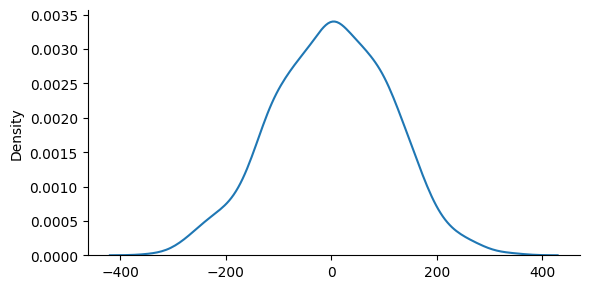

In [299]:
sns.displot(y, kind='kde', height=3, aspect=2)

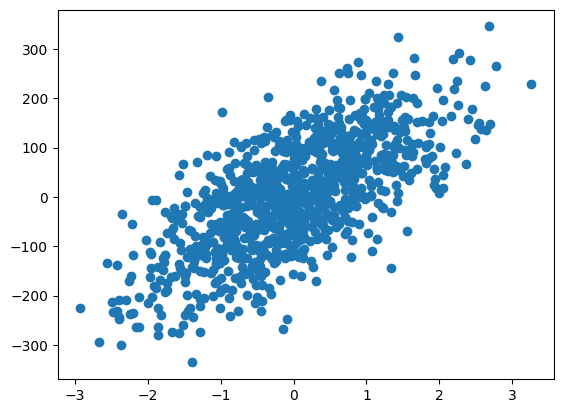

In [119]:
plt.scatter(X[:, 3], y)

<Axes: >

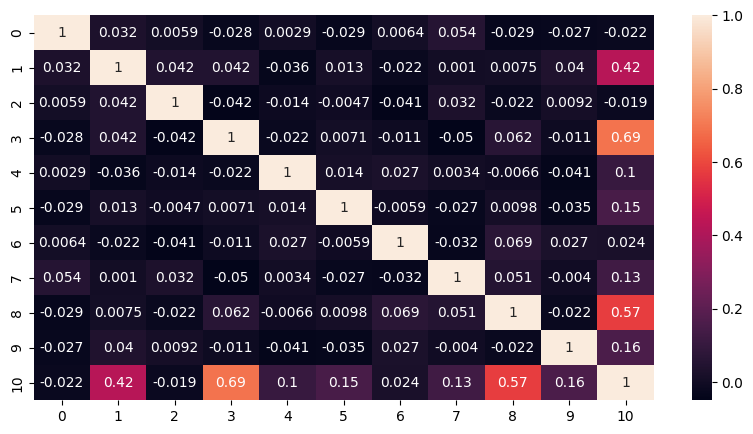

In [120]:
plt.figure(figsize=(10,5))
full_data = np.hstack((X, y.reshape(-1, 1)))
sns.heatmap(np.corrcoef(full_data.T), annot=True)

### Testing

In [303]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=41
)

In [304]:
print("OLS Linear Regression")
total_sum_squares = round((root_mean_squared_error(y_test, np.zeros(y_test.shape) + np.mean(y_test))*len(y_test)) ** 2, 4)
print(f"total sum of squares: {total_sum_squares}")
print(f"root mean squared error: {round(root_mean_squared_error(y_test, np.zeros(y_test.shape) + np.mean(y_test)), 4)}")

OLS Linear Regression
total sum of squares: 129408151.8894
root mean squared error: 113.7577


In [305]:
print("Linear Regression with gradient descent")
total_sum_squares = round((root_mean_squared_error(y_test, np.zeros(y_test.shape) + np.mean(y_test))*len(y_test)) ** 2, 4)
print(f"total sum of squares: {total_sum_squares}")
print(f"root mean squared error: {round(root_mean_squared_error(y_test, np.zeros(y_test.shape) + np.mean(y_test)), 4)}")

Linear Regression with gradient descent
total sum of squares: 129408151.8894
root mean squared error: 113.7577


In [306]:
olsLR = OLSLinearRegression(X_train, y_train)
olsLR.fit()

In [308]:
y_hat_ols = olsLR.predict(X_test)

In [309]:
olsLR.get_coeffs()

{'bias': array([-0.01293844]),
 'coeffs': array([ 2.63797845e-02,  4.40053094e+01,  1.87830352e-02,  7.12780311e+01,
         1.53545574e+01,  1.48385666e+01, -1.64763478e-02,  1.58972356e+01,
         5.88239409e+01,  1.87993787e+01])}

In [310]:
print("OLS Linear Regression")
sum_squared_error = round(((root_mean_squared_error(y_test, y_hat_ols))*len(y_test)) ** 2, 4)
print(f"sum of squared error: {sum_squared_error}")
print(f"root mean squared error: {round(root_mean_squared_error(y_test, y_hat_ols), 4)}")

OLS Linear Regression
sum of squared error: 9865.9836
root mean squared error: 0.9933


In [321]:
gdLR = GDLinearRegression(X_train, y_train, num_iters=1000)
gdLR.fit()

In [322]:
y_hat_gd = gdLR.predict(X_test)

In [323]:
gdLR.get_coeffs()

{'bias': array([[-0.01261406]]),
 'coeffs': array([[ 2.58110329e-02],
        [ 4.40040583e+01],
        [ 1.81369066e-02],
        [ 7.12772836e+01],
        [ 1.53525407e+01],
        [ 1.48381592e+01],
        [-1.57931924e-02],
        [ 1.58971018e+01],
        [ 5.88213428e+01],
        [ 1.87987528e+01]])}

In [324]:
print("Linear Regression with gradient descent")
sum_squared_error = round(((root_mean_squared_error(y_test, y_hat_gd))*len(y_test)) ** 2, 4)
print(f"sum of squared error: {sum_squared_error}")
print(f"root mean squared error: {round(root_mean_squared_error(y_test, y_hat_gd), 4)}")

Linear Regression with gradient descent
sum of squared error: 9861.0788
root mean squared error: 0.993


### Simple example

In [137]:
X, y = make_regression(
    n_samples=5000,
    n_features=1,
    bias=3.65,
    random_state=41
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=41
)

model = OLSLinearRegression(X_train, y_train)
model.fit()

In [138]:
y_hat = model.predict(X_test)

In [139]:
model.get_coeffs()

{'bias': array([3.65]), 'coeffs': array([25.12612782])}

In [140]:
sum_squared_error = round(((root_mean_squared_error(y_test, y_hat))*len(y_test)) ** 2, 4)
print(f"sum of squared error: {sum_squared_error}")
print(f"root mean squared error: {round(root_mean_squared_error(y_test, y_hat), 4)}")

sum of squared error: 0.0
root mean squared error: 0.0


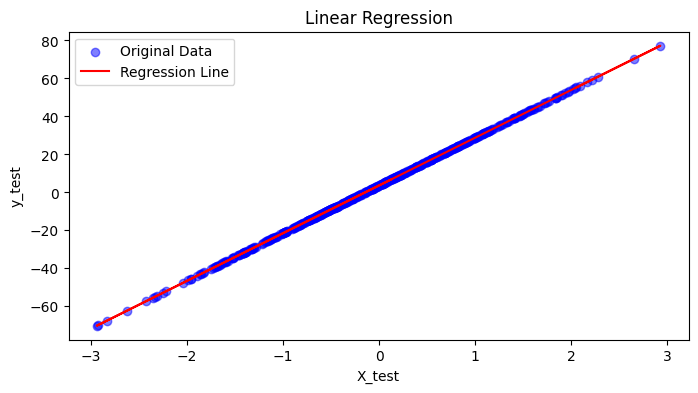

In [141]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color='blue', label='Original Data', alpha=0.5)
plt.plot(X_test, y_hat, color='red', label='Regression Line')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("Linear Regression")
plt.legend()

In [142]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
y_hat2 = lrm.predict(X_test)

In [143]:
sum_squared_error = round(((root_mean_squared_error(y_test, y_hat2))*len(y_test)) ** 2, 4)
print(f"sum of squared error: {sum_squared_error}")
print(f"root mean squared error: {round(root_mean_squared_error(y_test, y_hat2), 4)}")

sum of squared error: 0.0
root mean squared error: 0.0


In [146]:
lrm.intercept_, lrm.coef_

(3.6499999999999995, array([25.12612782]))

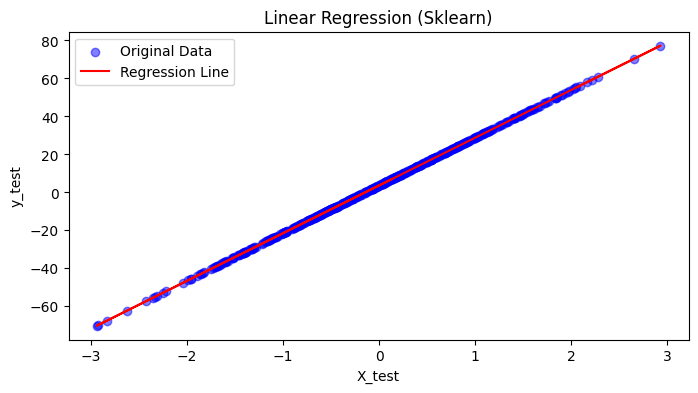

In [144]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color='blue', label='Original Data', alpha=0.5)
plt.plot(X_test, y_hat2, color='red', label='Regression Line')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("Linear Regression (Sklearn)")
plt.legend()

## Logistic Regression

In [325]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression as SKLLogisticRegression
from pprint import pprint

In [326]:
class LogisticRegression:
    """
    Logistic Regression
    """
    def __init__(self, X, y, learning_rate=0.01, num_iters=100):
        self.num_features = X.shape[1]
        self.num_samples = X.shape[0]
        self.theta = np.zeros((self.num_features + 1, 1))
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.num_iters = num_iters

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def compute_gradients(self, X, y):
        err = self.sigmoid(np.dot(X, self.theta)) - y.reshape(-1, 1)
        grads = np.mean(X * err, axis=0).reshape(-1, 1)
        # grads = np.dot(X.T, err) / self.num_samples
        return grads

    def fit(self):
        bias = np.ones((self.num_samples, 1))
        X = np.hstack((bias, self.X))
        for _ in range(self.num_iters):
            grads = self.compute_gradients(X, self.y)
            self.theta -= self.learning_rate * grads

    def predict(self, X_test):
        y_hat_proba = self.predict_proba(X_test)
        return (y_hat_proba > 0.5).astype(int)

    def predict_proba(self, X_test):
        bias = np.ones((X_test.shape[0], 1))
        X_test = np.hstack((bias, X_test))
        y_hat_proba = self.sigmoid(np.dot(X_test, self.theta)).flatten()
        return y_hat_proba

    def get_coeffs(self):
        return {
            "bias" : self.theta[:1],
            "coeffs" : self.theta[1:]
        }

### Testing

In [327]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=7,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.01, class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=42
)

<Axes: >

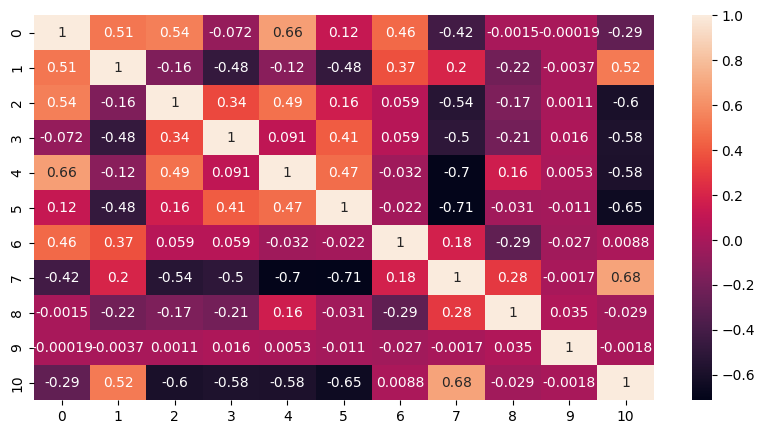

In [328]:
plt.figure(figsize=(10,5))
full_data = np.hstack((X, y.reshape(-1, 1)))
sns.heatmap(np.corrcoef(full_data.T), annot=True)

In [329]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42
)

In [330]:
model = LogisticRegression(X_train, y_train, num_iters=5000)
model.fit()

In [331]:
pprint(model.get_coeffs())

{'bias': array([[0.68287865]]),
 'coeffs': array([[-0.47236698],
       [ 1.24297278],
       [-0.8415546 ],
       [-0.62402958],
       [-0.49490606],
       [-0.75874979],
       [-0.47840003],
       [ 0.39259591],
       [-0.12537427],
       [-0.14105437]])}


In [332]:
y_pred = model.predict(X_test)

In [333]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.98      0.99        57

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



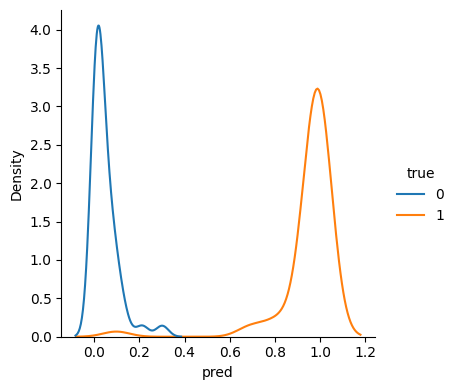

In [342]:
import pandas as pd
y_pred_proba = model.predict_proba(X_test)
temp_df = pd.DataFrame({"pred":y_pred_proba,"true":y_test})
sns.displot(temp_df, x="pred", hue="true", kind="kde", height=4)

### Simple example

In [343]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.0,
    random_state=41
)

<Axes: >

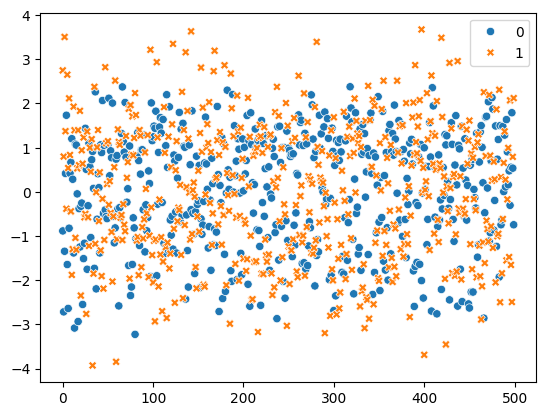

In [344]:
sns.scatterplot(X)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=41
)

gdlogreg = LogisticRegression(X_train, y_train, num_iters=500)
gdlogreg.fit()

In [346]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(grid_points).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu_r')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', edgecolor='k', s=50)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', edgecolor='k', s=50)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Decision Boundary of Logistic Regression Model")
    plt.show()

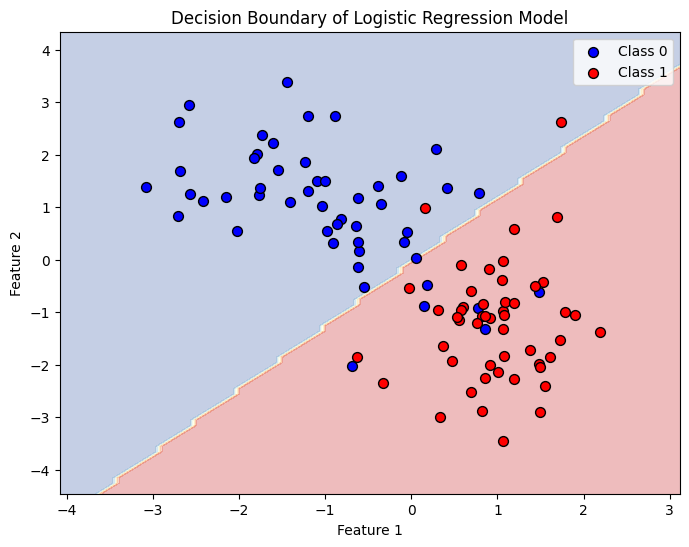

In [348]:
plot_decision_boundary(gdlogreg, X_test, y_test)

In [349]:
pprint(gdlogreg.get_coeffs())

{'bias': array([[-0.03524067]]),
 'coeffs': array([[ 0.96988279],
       [-0.80034709]])}


In [350]:
y_pred = gdlogreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       0.89      0.96      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



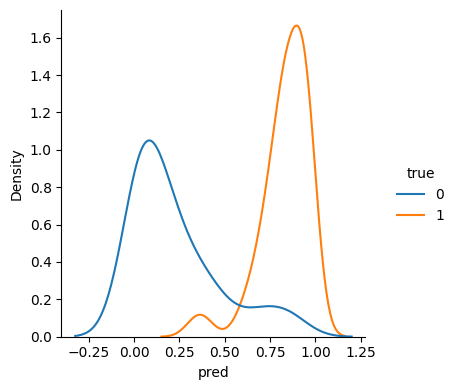

In [351]:
import pandas as pd
y_pred_proba = gdlogreg.predict_proba(X_test)
temp_df = pd.DataFrame({"pred":y_pred_proba,"true":y_test})
sns.displot(temp_df, x="pred", hue="true", kind="kde", height=4)

## Linear Regression (via gradient descent)

In [296]:
class GDLinearRegression:
    """
    Linear Regression via gradient descent
    """
    def __init__(self, X, y, learning_rate=0.01, num_iters=100):
        self.num_features = X.shape[1]
        self.num_samples = X.shape[0]
        self.theta = np.zeros((self.num_features + 1, 1))
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.num_iters = num_iters

    def compute_gradients(self, X, y):
        err = np.dot(X, self.theta) - y.reshape(-1, 1)
        grads = np.mean(X * err, axis=0).reshape(-1, 1)
        # grads = np.dot(X.T, err) / self.num_samples
        return grads

    def fit(self):
        bias = np.ones((self.num_samples, 1))
        X = np.hstack((bias, self.X))
        for _ in range(self.num_iters):
            grads = self.compute_gradients(X, self.y)
            self.theta -= self.learning_rate * grads

    def predict(self, X_test):
        bias = np.ones((X_test.shape[0], 1))
        X_test = np.hstack((bias, X_test))
        y_hat = np.dot(X_test, self.theta)
        return y_hat

    def get_coeffs(self):
        return {
            "bias" : self.theta[:1],
            "coeffs" : self.theta[1:]
        }

Already tested and compared above with OLS Linear Regression